<a href="https://colab.research.google.com/github/zahra75koosha/zahra-koosha/blob/master/ccn_hoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 uninstall tensorflow
!pip3 install tensorflow.gpu==2.0.0

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/hoda dataset
%ls

/content/drive/My Drive/hoda dataset
 hoda_dataset_helper.py   RemainingSamples.cdb  'Train 60000.cdb'
 __pycache__/            'Test 20000.cdb'


In [0]:

from hoda_dataset_helper import __read_hoda_dataset
from hoda_dataset_helper import __read_hoda_cdb

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2)

import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten,GlobalAveragePooling2D

from tensorflow.keras.callbacks import ReduceLROnPlateau

Load Dataset

In [0]:
# Reading train dataset 
X_train, Y_train = __read_hoda_dataset(dataset_path='./Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=True, # set one hot= True to encode training_label to one hot vector
                                reshape=True)

In [0]:
# reading test dataset
X_test, Y_test = __read_hoda_dataset(dataset_path='./Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=True,
                              reshape=False)

In [0]:
# Reading remain samples dataset 
X_remain, Y_remain = __read_hoda_dataset('./RemainingSamples.cdb',
                                             images_height=32,
                                             images_width=32,
                                             one_hot=True,
                                             reshape=True)

In [0]:
# reading train image
train_images, train_labels = __read_hoda_cdb('./Train 60000.cdb')

In [0]:
# reading test image
test_images, test_labels = __read_hoda_cdb('./Test 20000.cdb')

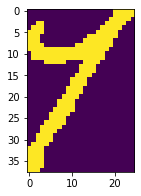

In [0]:
# plot a data sample
fig = plt.figure(figsize=(15, 3))
plt.imshow(train_images[11])

In [0]:
#normalization
X_train =X_train / 255.0
X_test = X_test /255.0

In [0]:
# reshape the train_samples to 3 dimension
X_train=X_train.reshape(-1,32,32,1)
X_remain=X_remain.reshape(-1,32,32,1)


In [0]:
print(f'shape of X_train is : {X_train.shape}')
print(f'shape of Y_train is : {Y_train.shape}')

print(f'shape of X_test is : {X_test.shape}')
print(f'shape of Y_test is : {Y_test.shape}')

print(f'shape of X_reamin is : {X_remain.shape}')
print(f'shape of Y_remain is : {Y_remain.shape}')

shape of X_train is : (60000, 32, 32, 1)
shape of Y_train is : (60000, 10)
shape of X_test is : (20000, 32, 32, 1)
shape of Y_test is : (20000, 10)
shape of X_reamin is : (22352, 32, 32, 1)
shape of Y_remain is : (22352, 10)


In [0]:
# split training dataset to validation and train samples
random_seed=2
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val= train_test_split(X_train,Y_train,test_size=0.1, random_state=random_seed)

In [0]:
print(f'shape of X_val is : {X_val.shape}')
print(f'shape of Y_val is : {Y_val.shape}')

shape of X_val is : (6000, 32, 32, 1)
shape of Y_val is : (6000, 10)


CNN model

In [0]:
model= Sequential()

model.add(Conv2D(32,(5,5), activation='relu', padding='same', input_shape=(32,32,1)))
model.add(Conv2D(32,(5,5), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# classifier
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 32

In [0]:
result=model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val,Y_val), verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 33s 607us/sample - loss: 0.2639 - accuracy: 0.9113 - val_loss: 0.0783 - val_accuracy: 0.9832
Epoch 2/20
54000/54000 [==============================] - 26s 486us/sample - loss: 0.0539 - accuracy: 0.9840 - val_loss: 0.0293 - val_accuracy: 0.9903
Epoch 3/20
54000/54000 [==============================] - 26s 476us/sample - loss: 0.0448 - accuracy: 0.9879 - val_loss: 0.0229 - val_accuracy: 0.9928
Epoch 4/20
54000/54000 [==============================] - 26s 478us/sample - loss: 0.0424 - accuracy: 0.9887 - val_loss: 0.0284 - val_accuracy: 0.9925
Epoch 5/20
54000/54000 [==============================] - 26s 478us/sample - loss: 0.0408 - accuracy: 0.9890 - val_loss: 0.0303 - val_accuracy: 0.9913
Epoch 6/20
54000/54000 [==============================] - 26s 477us/sample - loss: 0.0419 - accuracy: 0.9887 - val_loss: 0.0280 - val_accuracy: 0.9918
Epoch 7/20
54000/54000 [=====================